In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
df = pd.read_csv('D:\\Udemy\\2021 Python for Machine Learning & Data Science Masterclass\\17-Supervised-Learning-Capstone-Project\\Telco-Customer-Churn.csv')

In [96]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [97]:
df.info() #tidak ada data yang null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [98]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [99]:
df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


<AxesSubplot:xlabel='Churn', ylabel='count'>

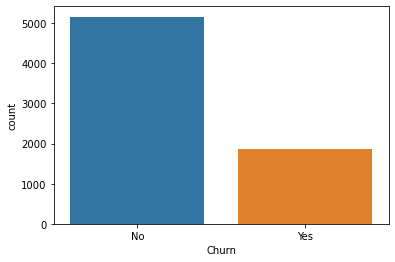

In [100]:
sns.countplot(x = 'Churn', data =df) #A lot of No than yes categorial

In [101]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

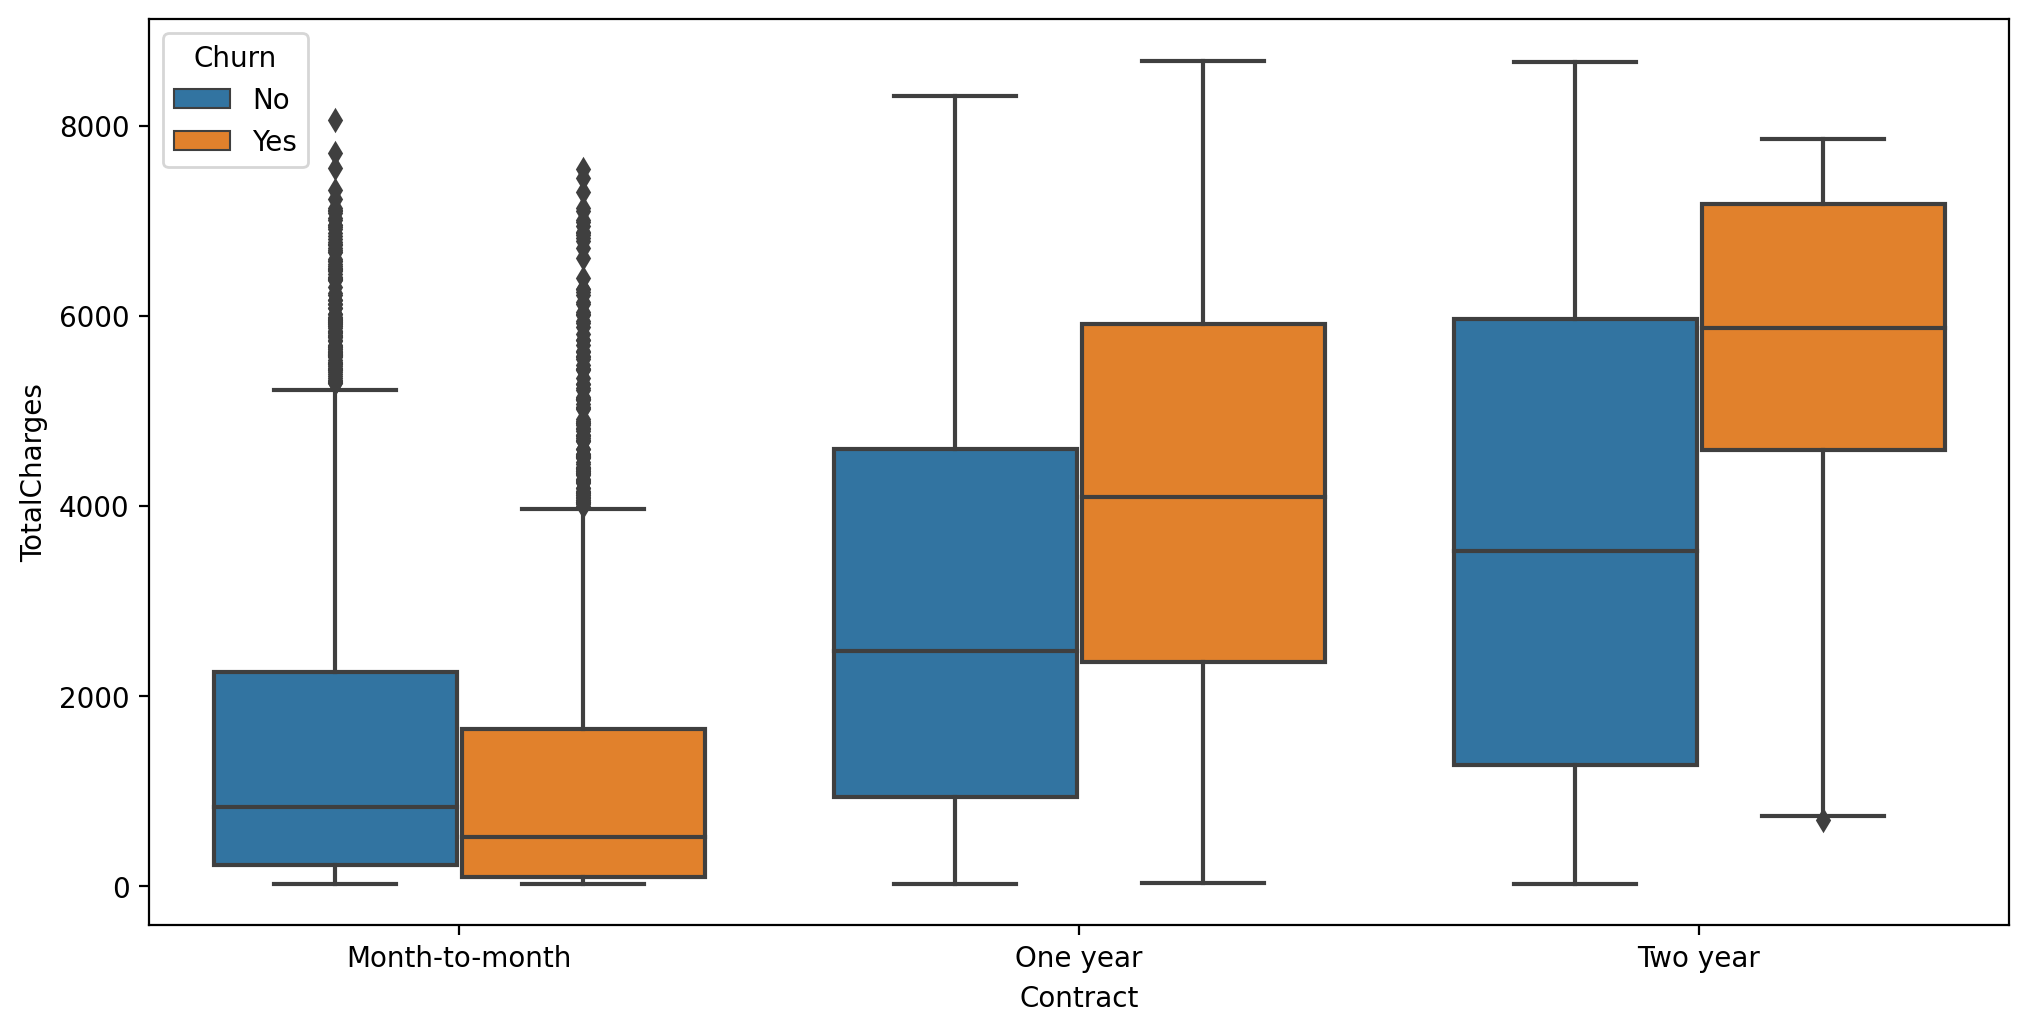

In [102]:
plt.figure(figsize = (12,6), dpi = 200)
sns.boxplot(data = df, y ='TotalCharges', x = 'Contract', hue = 'Churn')
#from here we can see if the distribution for contract two and one have a good distibution but for month to month have a poor distibution

# Checking the corrolation between feature (column) in data 

In [103]:
corr_data = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']], drop_first = True).corr().sort_values(by = 'Churn_Yes')

In [104]:
corr_data['Churn_Yes']

Contract_Two year                       -0.301552
StreamingMovies_No internet service     -0.227578
StreamingTV_No internet service         -0.227578
TechSupport_No internet service         -0.227578
OnlineSecurity_No internet service      -0.227578
InternetService_No                      -0.227578
DeviceProtection_No internet service    -0.227578
OnlineBackup_No internet service        -0.227578
Contract_One year                       -0.178225
OnlineSecurity_Yes                      -0.171270
TechSupport_Yes                         -0.164716
Dependents_Yes                          -0.163128
Partner_Yes                             -0.149982
PaymentMethod_Credit card (automatic)   -0.134687
PaymentMethod_Mailed check              -0.090773
OnlineBackup_Yes                        -0.082307
DeviceProtection_Yes                    -0.066193
MultipleLines_No phone service          -0.011691
gender_Male                             -0.008545
PhoneService_Yes                         0.011691


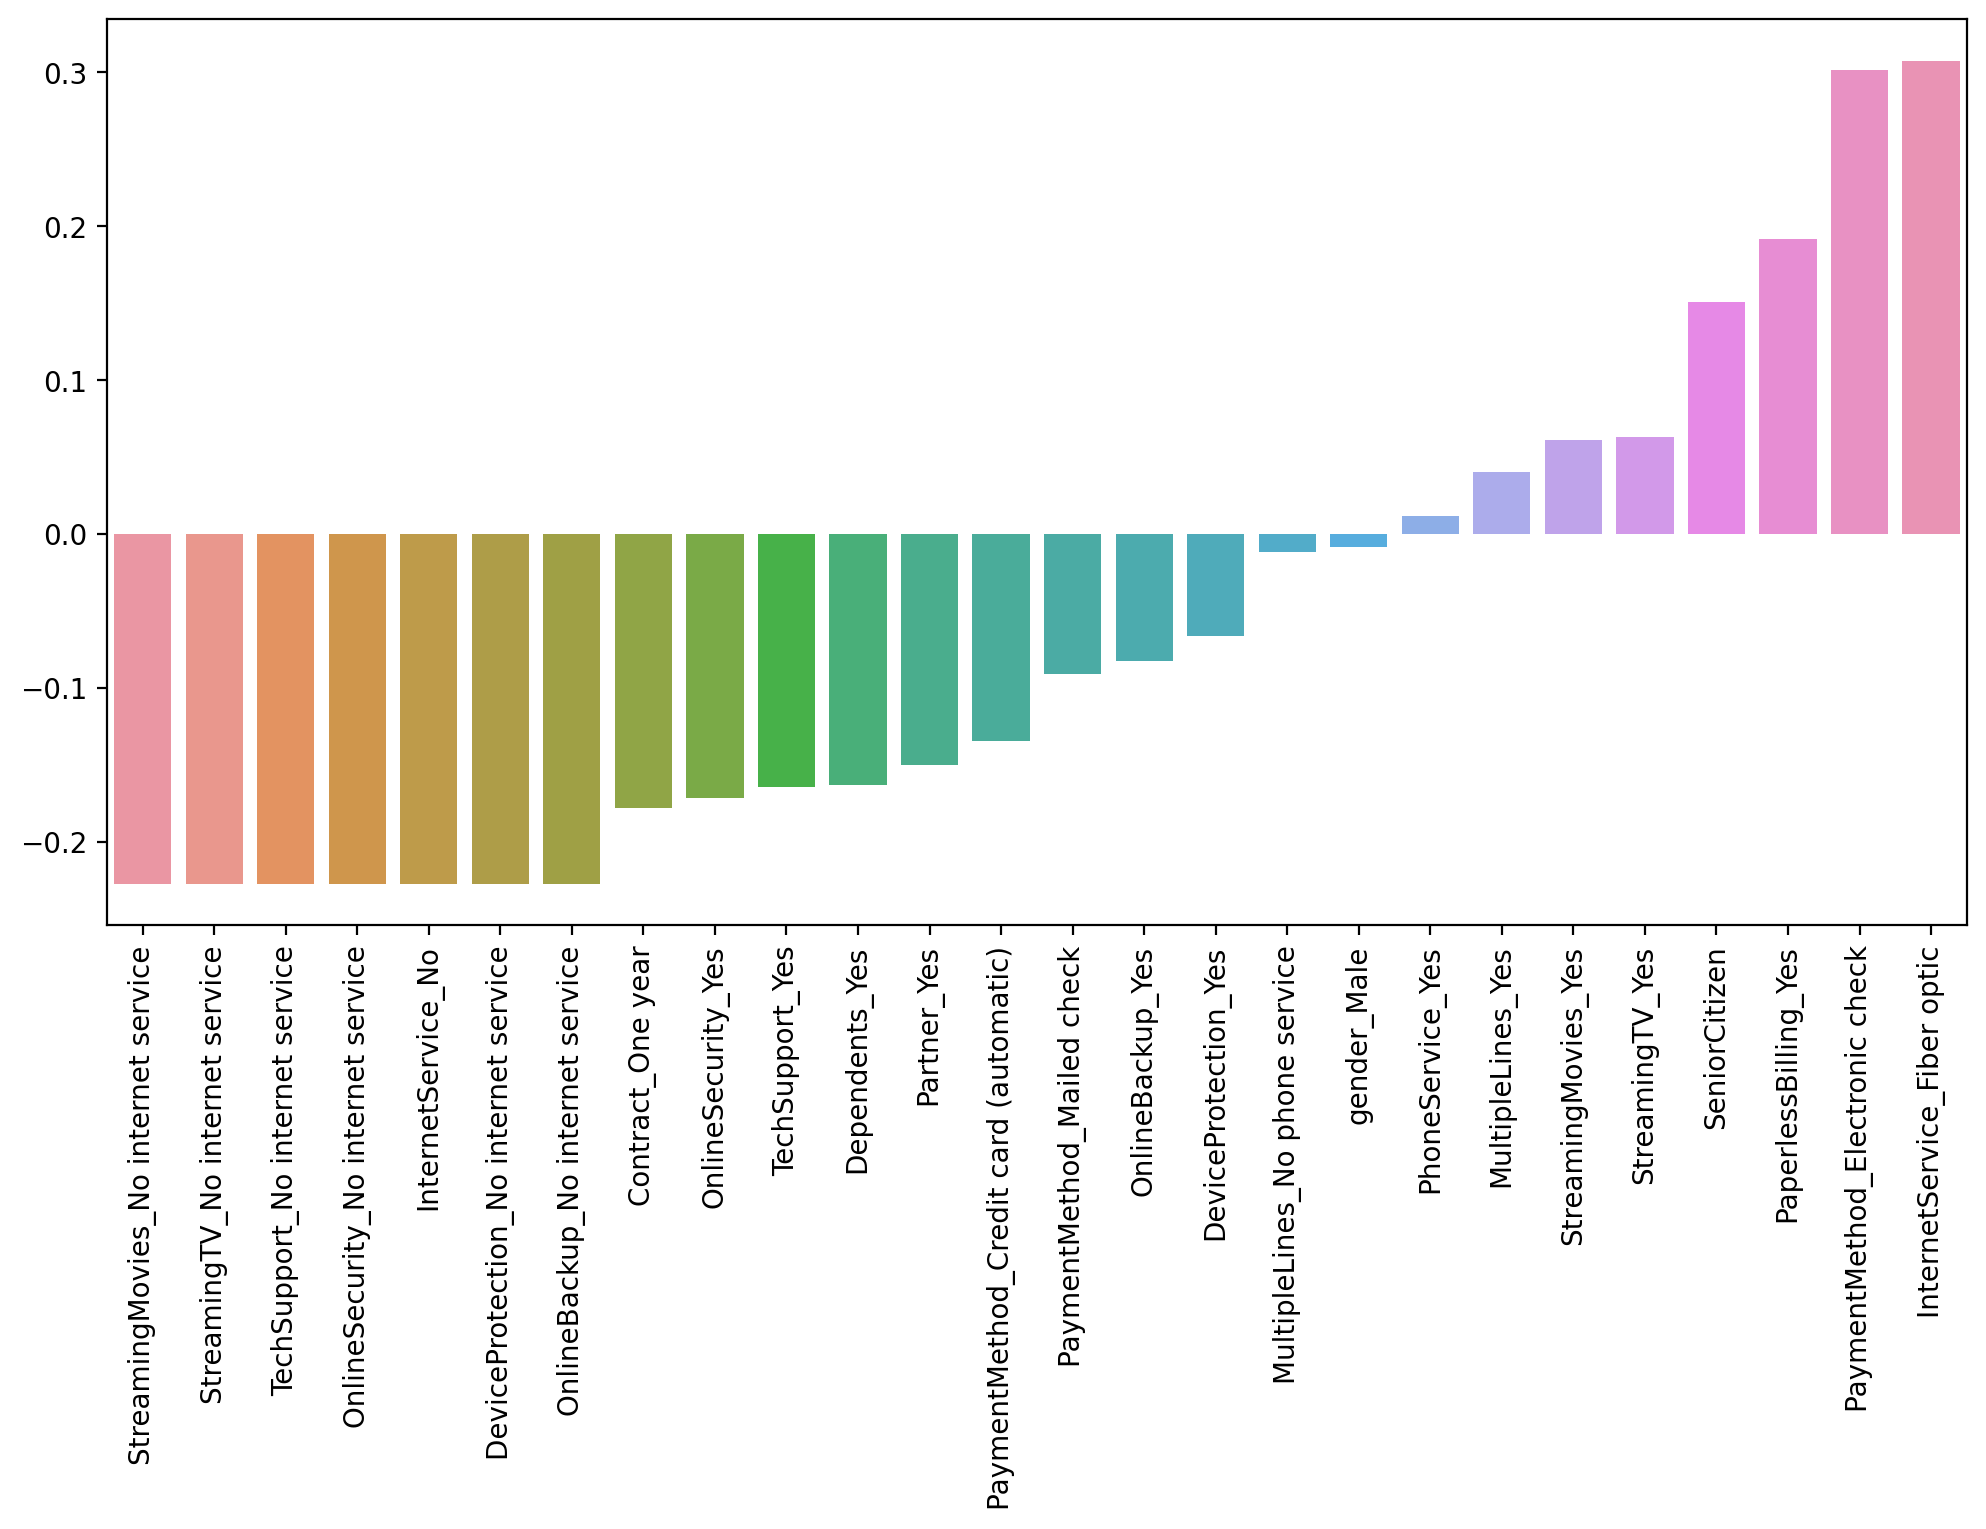

In [105]:
plt.figure(figsize = (12,6), dpi = 200)
sns.barplot(x = corr_data.iloc[1:-1].index, y = corr_data['Churn_Yes'].iloc[1:-1].values)
plt.xticks(rotation = 90);

From The figure the corelation with Churn_Yes (data column that have information about customer churn telecom yes/no), the most high corelation is from column contract_month-to-month and have a little corelation from column contract_two year

In [106]:
corr_data['Churn_Yes'].iloc[1:-1].values

array([-0.22757762, -0.22757762, -0.22757762, -0.22757762, -0.22757762,
       -0.22757762, -0.22757762, -0.17822502, -0.17126992, -0.16471591,
       -0.16312844, -0.14998193, -0.13468684, -0.09077285, -0.08230697,
       -0.06619252, -0.0116914 , -0.00854464,  0.0116914 ,  0.04003274,
        0.06085994,  0.06325398,  0.15054105,  0.19145432,  0.30145464,
        0.30746259])

# Churn Analysis 

<AxesSubplot:xlabel='tenure', ylabel='Count'>

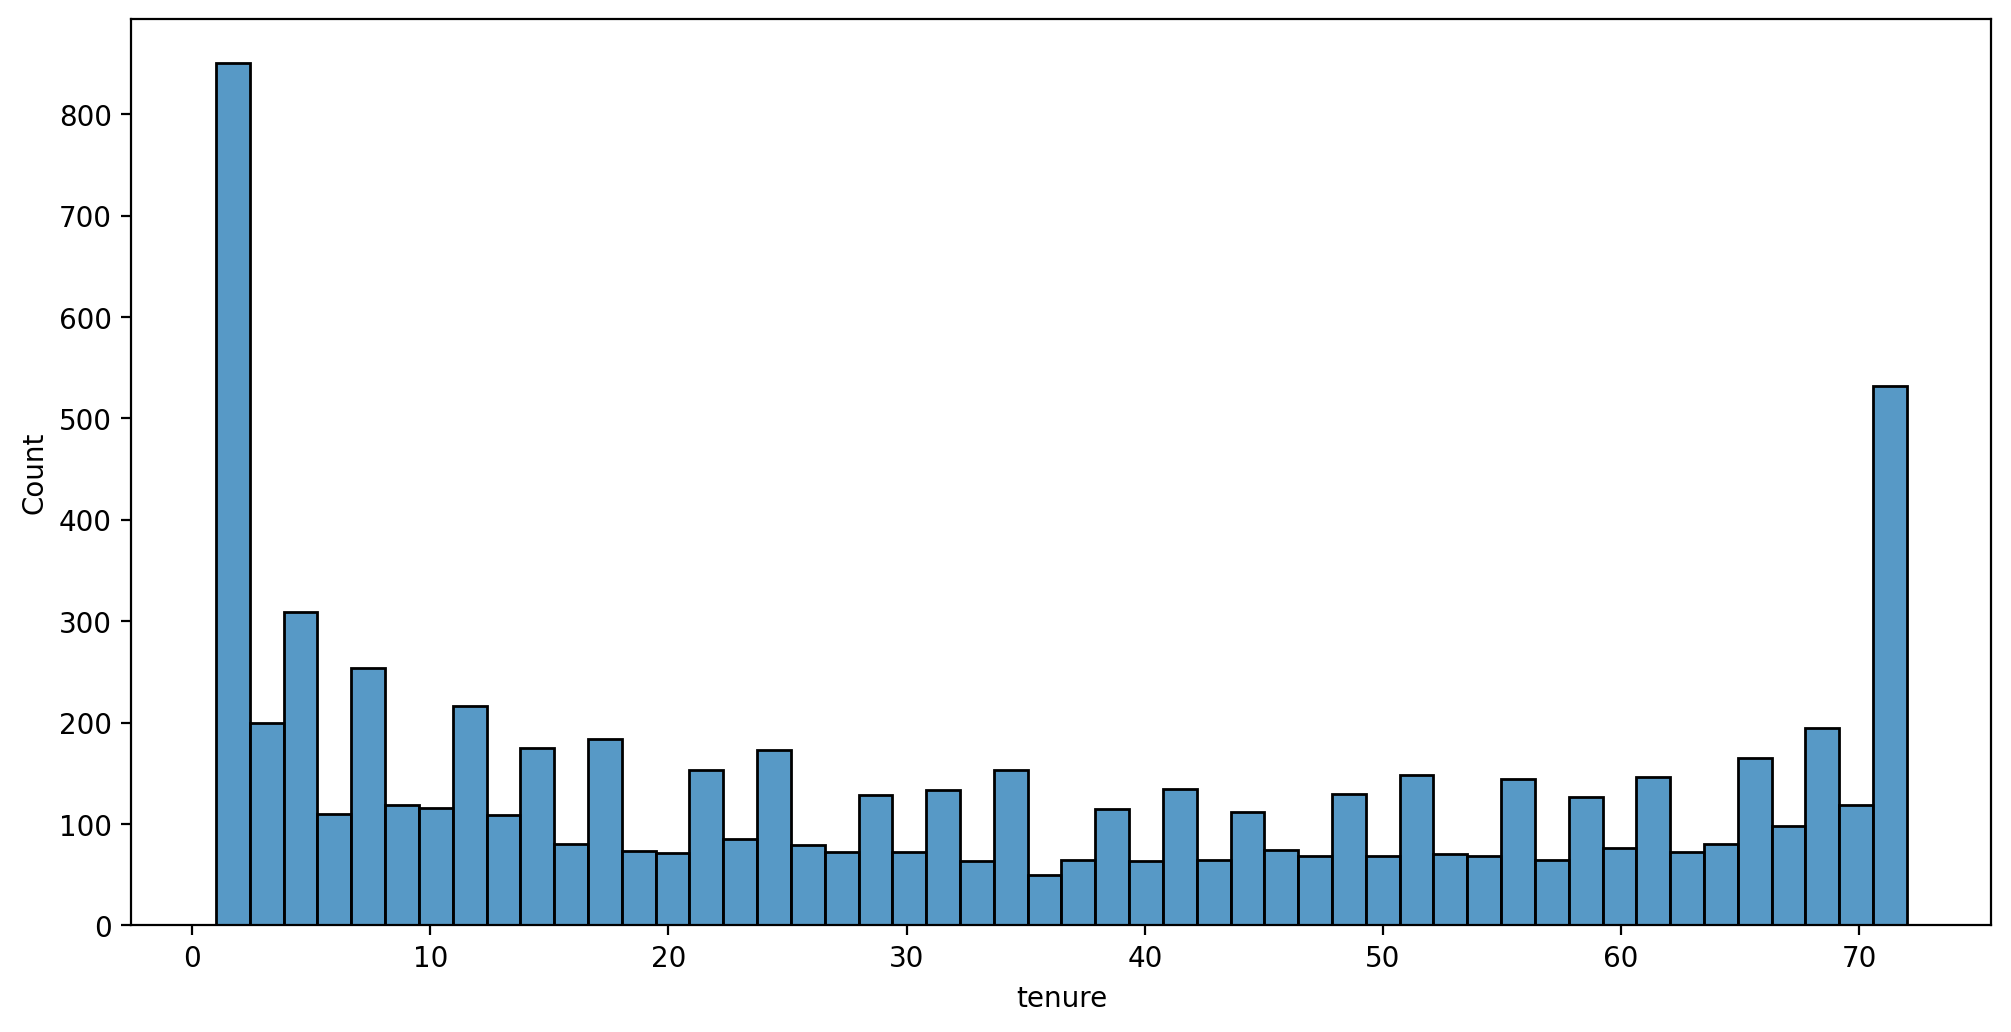

In [107]:
#distribution of tenure (Mounth for customer being customer)
plt.figure(figsize = (12,6), dpi = 200)
sns.histplot(data =df, x = 'tenure', bins = 50)

<Figure size 2400x1200 with 0 Axes>

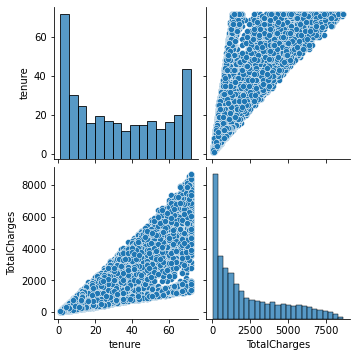

In [108]:
plt.figure(figsize = (12,6), dpi = 200)
sns.pairplot(data = df[['Churn', 'tenure', "TotalCharges"]])

In [109]:
percentage_churn = pd.get_dummies(drop_first = True, data = df).groupby(by = 'tenure').mean()['Churn_Yes']*100

In [110]:
percentage_churn #percentage of churn from 1 mounth until 72 mounth
#the percentage for yes churn bigger with the tenure 1 mounth because from analytic if customer subcribe for only 1 mounth the customer
#it most likely to churn the subcribe

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: Churn_Yes, Length: 72, dtype: float64

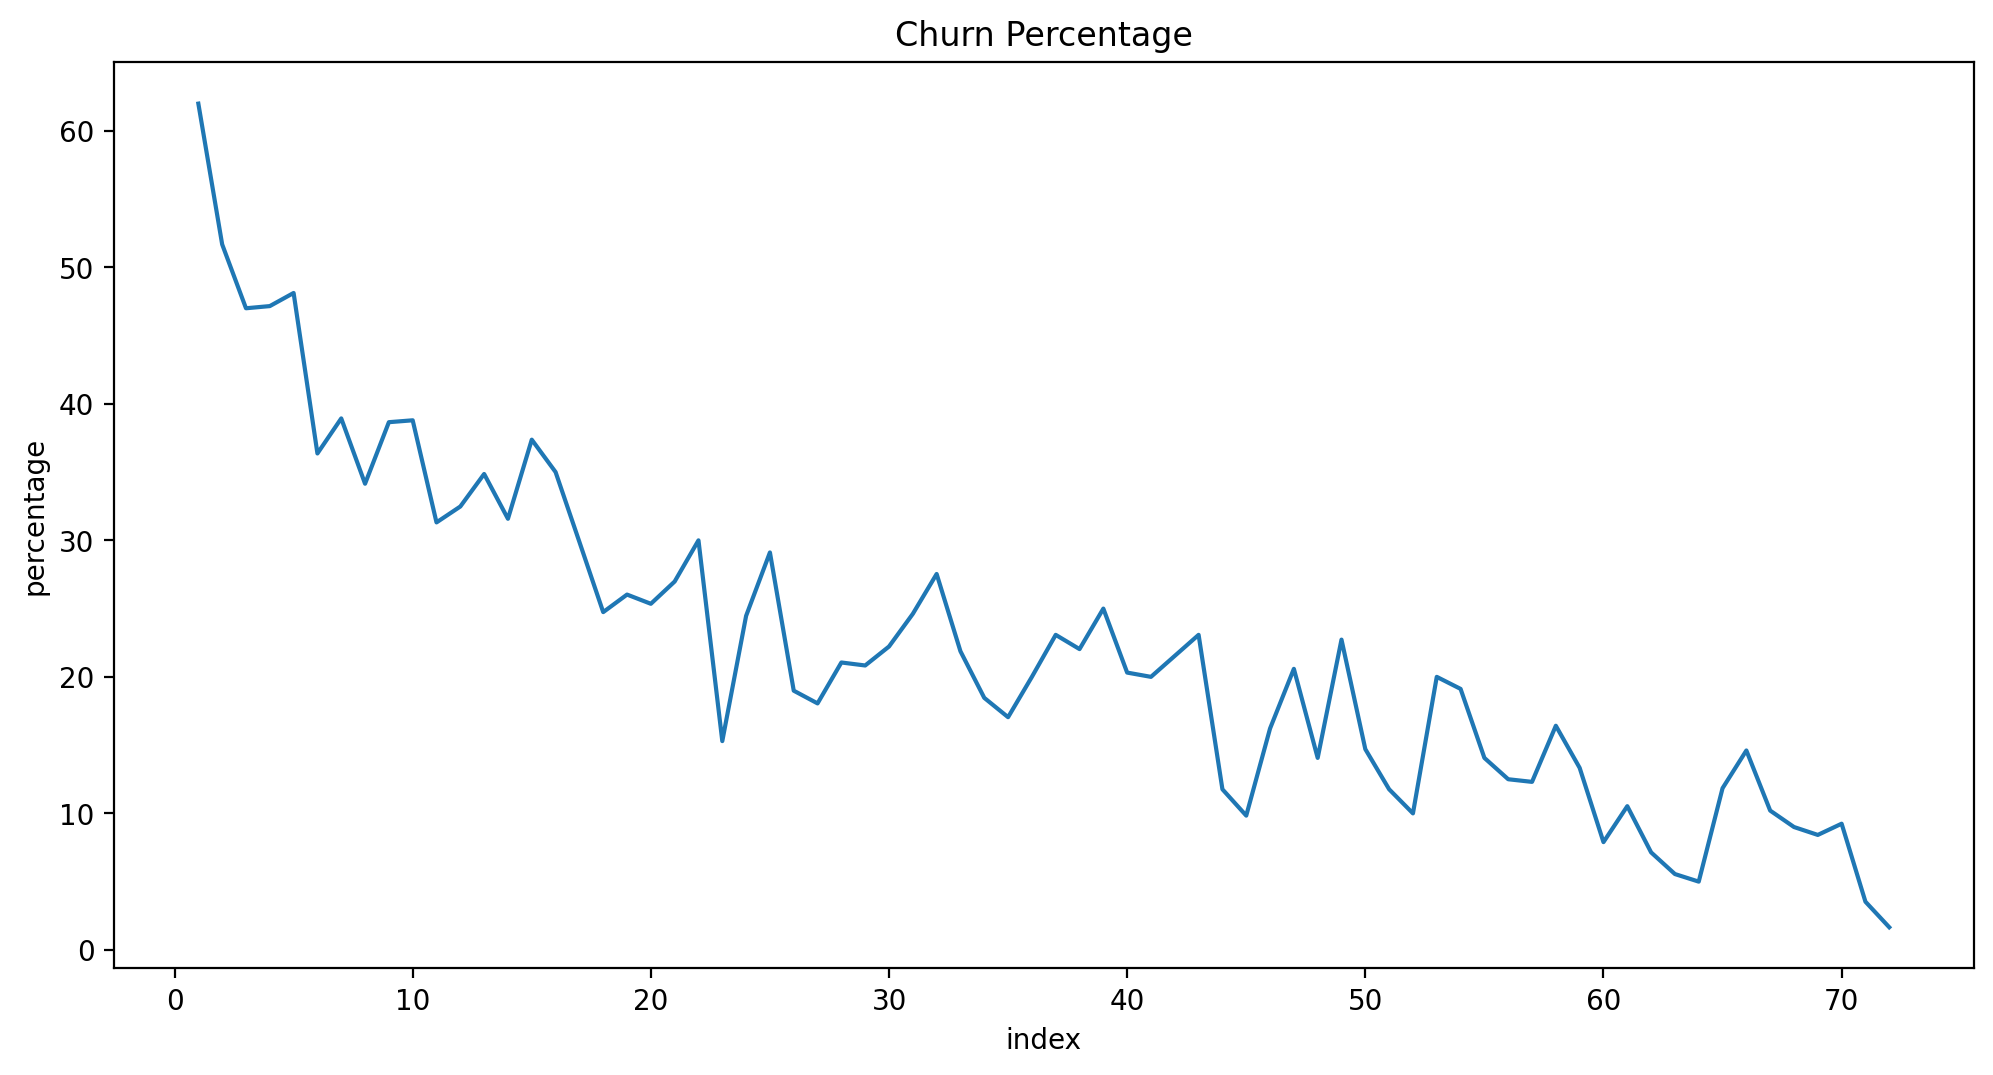

In [111]:
plt.figure(figsize = (12,6), dpi =200)
plt.plot(percentage_churn.index,percentage_churn.values)
plt.ylabel('percentage')
plt.xlabel('index')
plt.title('Churn Percentage');

# Data Split To Train and Test

In [112]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [115]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [113]:
from sklearn.model_selection import train_test_split

In [120]:
x = df.drop(['Churn', 'customerID'], axis = 1)
x= pd.get_dummies(drop_first = True, data = x) #makin hot encoding to easier in calculating the model

In [121]:
y = df['Churn']

In [129]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 50) 
#random_state = 50 if you want to check for yourself if the split is right

# Scaling The Feature Data

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
scale = StandardScaler()

In [132]:
x_train_scale = scale.fit_transform(x_train, y_train)

In [133]:
x_test_scale = scale.transform(x_test)

# Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression

In [140]:
lgr = LogisticRegression()

In [141]:
lgr.fit(x_train_scale, y_train)

LogisticRegression()

In [153]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [154]:
x_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2058,0,51,76.40,3966.30,1,1,1,1,0,0,...,0,1,0,1,1,0,1,0,0,0
4875,1,8,29.40,221.90,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4943,1,29,84.30,2357.75,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
6237,0,54,65.30,3512.90,1,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
3754,0,3,73.60,232.50,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,0,67,104.10,7040.85,1,1,0,1,0,1,...,0,1,0,1,1,0,0,0,1,0
6253,0,45,96.75,4442.75,0,0,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
1931,0,51,60.50,3145.15,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
5600,0,29,80.15,2265.25,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [170]:
pd.DataFrame(data = [x_train.columns, lgr.coef_[0]]).T.sort_values(by = 1, ascending = False) 
#from here we know that the totalcharge is the most important for calculating the logistic regression model with coeffisien 0.850125 

,0,1
3,TotalCharges,0.850125
10,InternetService_Fiber optic,0.546903
26,PaperlessBilling_Yes,0.191276
21,StreamingTV_Yes,0.170141
9,MultipleLines_Yes,0.166684
23,StreamingMovies_Yes,0.151152
28,PaymentMethod_Electronic check,0.131519
0,SeniorCitizen,0.060066
8,MultipleLines_No phone service,0.0548741
17,DeviceProtection_Yes,0.0178664


In [172]:
y_prediction_lgr = lgr.predict(x_test_scale)

# Performance Calculation For Logistic Regression

In [177]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [185]:
print(classification_report(y_test, y_prediction_lgr)) #good precission for the model

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       536
         Yes       0.63      0.58      0.60       168

    accuracy                           0.82       704
   macro avg       0.75      0.74      0.74       704
weighted avg       0.81      0.82      0.82       704



In [187]:
accuracy_score(y_test, y_prediction_lgr)

0.8181818181818182

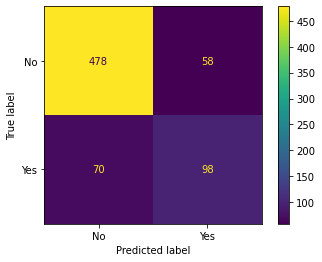

In [189]:
plot_confusion_matrix(lgr, x_test_scale, y_test) 

# K Nearest Neighbor

In [191]:
from sklearn.neighbors import KNeighborsClassifier

In [192]:
from sklearn.model_selection import GridSearchCV

In [208]:
KNN = KNeighborsClassifier()

In [211]:
param_grid = {'n_neighbors':[1,5,10,20,30]}

In [210]:
grid_KNN = GridSearchCV(estimator = KNN, param_grid=param_grid)

In [203]:
grid_KNN.fit(x_train_scale, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 5, 10, 20, 30]})

In [204]:
grid_KNN.best_estimator_ #looking for best parameter for KNN model

KNeighborsClassifier(n_neighbors=30)

In [205]:
y_predict_KNN = grid_KNN.predict(x_test_scale)

# Performance KNN

In [206]:
print(classification_report(y_test, y_predict_KNN))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       536
         Yes       0.62      0.58      0.60       168

    accuracy                           0.81       704
   macro avg       0.74      0.73      0.74       704
weighted avg       0.81      0.81      0.81       704



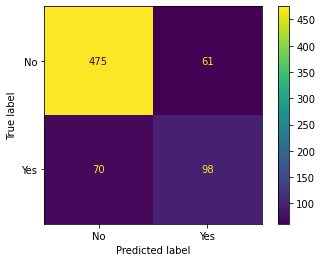

In [207]:
plot_confusion_matrix(grid_KNN, x_test_scale, y_test)

# Support Vector Mechine

In [212]:
from sklearn.svm import SVC

In [213]:
SVC = SVC()

In [214]:
param_grid = {'kernel':['linear', 'rbf', 'sigmoid'],
             'C':[0.01, 0.1, 1, 10]}

In [215]:
grid_SVC = GridSearchCV(SVC, param_grid = param_grid)

In [216]:
grid_SVC.fit(x_train_scale, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [219]:
grid_SVC.best_estimator_ #using grid search to looking best kernel and C value for parameter support vector mechine

SVC(C=10, kernel='linear')

In [224]:
y_pred_SVC = grid_SVC.predict(x_test_scale)

# Support Vector Classifier perforamce

In [234]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       536
         Yes       0.61      0.57      0.59       168

    accuracy                           0.81       704
   macro avg       0.74      0.73      0.73       704
weighted avg       0.81      0.81      0.81       704



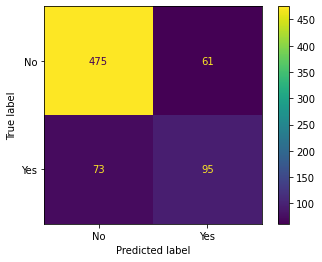

In [235]:
plot_confusion_matrix(grid_SVC, x_test_scale, y_test)

# Decision Tree 

In [237]:
from sklearn.tree import DecisionTreeClassifier

In [278]:
DTC = DecisionTreeClassifier(max_depth=4)

In [279]:
#param_grid = {'max_depth':[2,3,4,5]}

In [280]:
#grid_DTC = GridSearchCV(DTC, param_grid = param_grid)

In [264]:
#grid_DTC.fit(x_train_scale, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5]})

In [268]:
#grid_DTC.best_estimator_

DecisionTreeClassifier(max_depth=4)

In [281]:
DTC.fit(x_train_scale, y_train)

DecisionTreeClassifier(max_depth=4)

In [282]:
y_pred_DTC = DTC.predict(x_test_scale)

# Feature Importance From Decision Tree

From data frame below we know if the feature importance of column the highest efect of descision tree model is column tenure

In [283]:
pd.DataFrame(data = grid_DTC.best_estimator_.feature_importances_, index = x_train.columns, columns=['Feature Importance']).sort_values(by = 'Feature Importance', ascending = False)

,Feature Importance
tenure,0.433962
InternetService_Fiber optic,0.372317
Contract_Two year,0.065656
InternetService_No,0.046206
Contract_One year,0.032103
TotalCharges,0.023233
MultipleLines_Yes,0.010955
MultipleLines_No phone service,0.008583
TechSupport_Yes,0.006592
MonthlyCharges,0.000392


# Decsion Tree Plot

In [289]:
from sklearn.tree import plot_tree

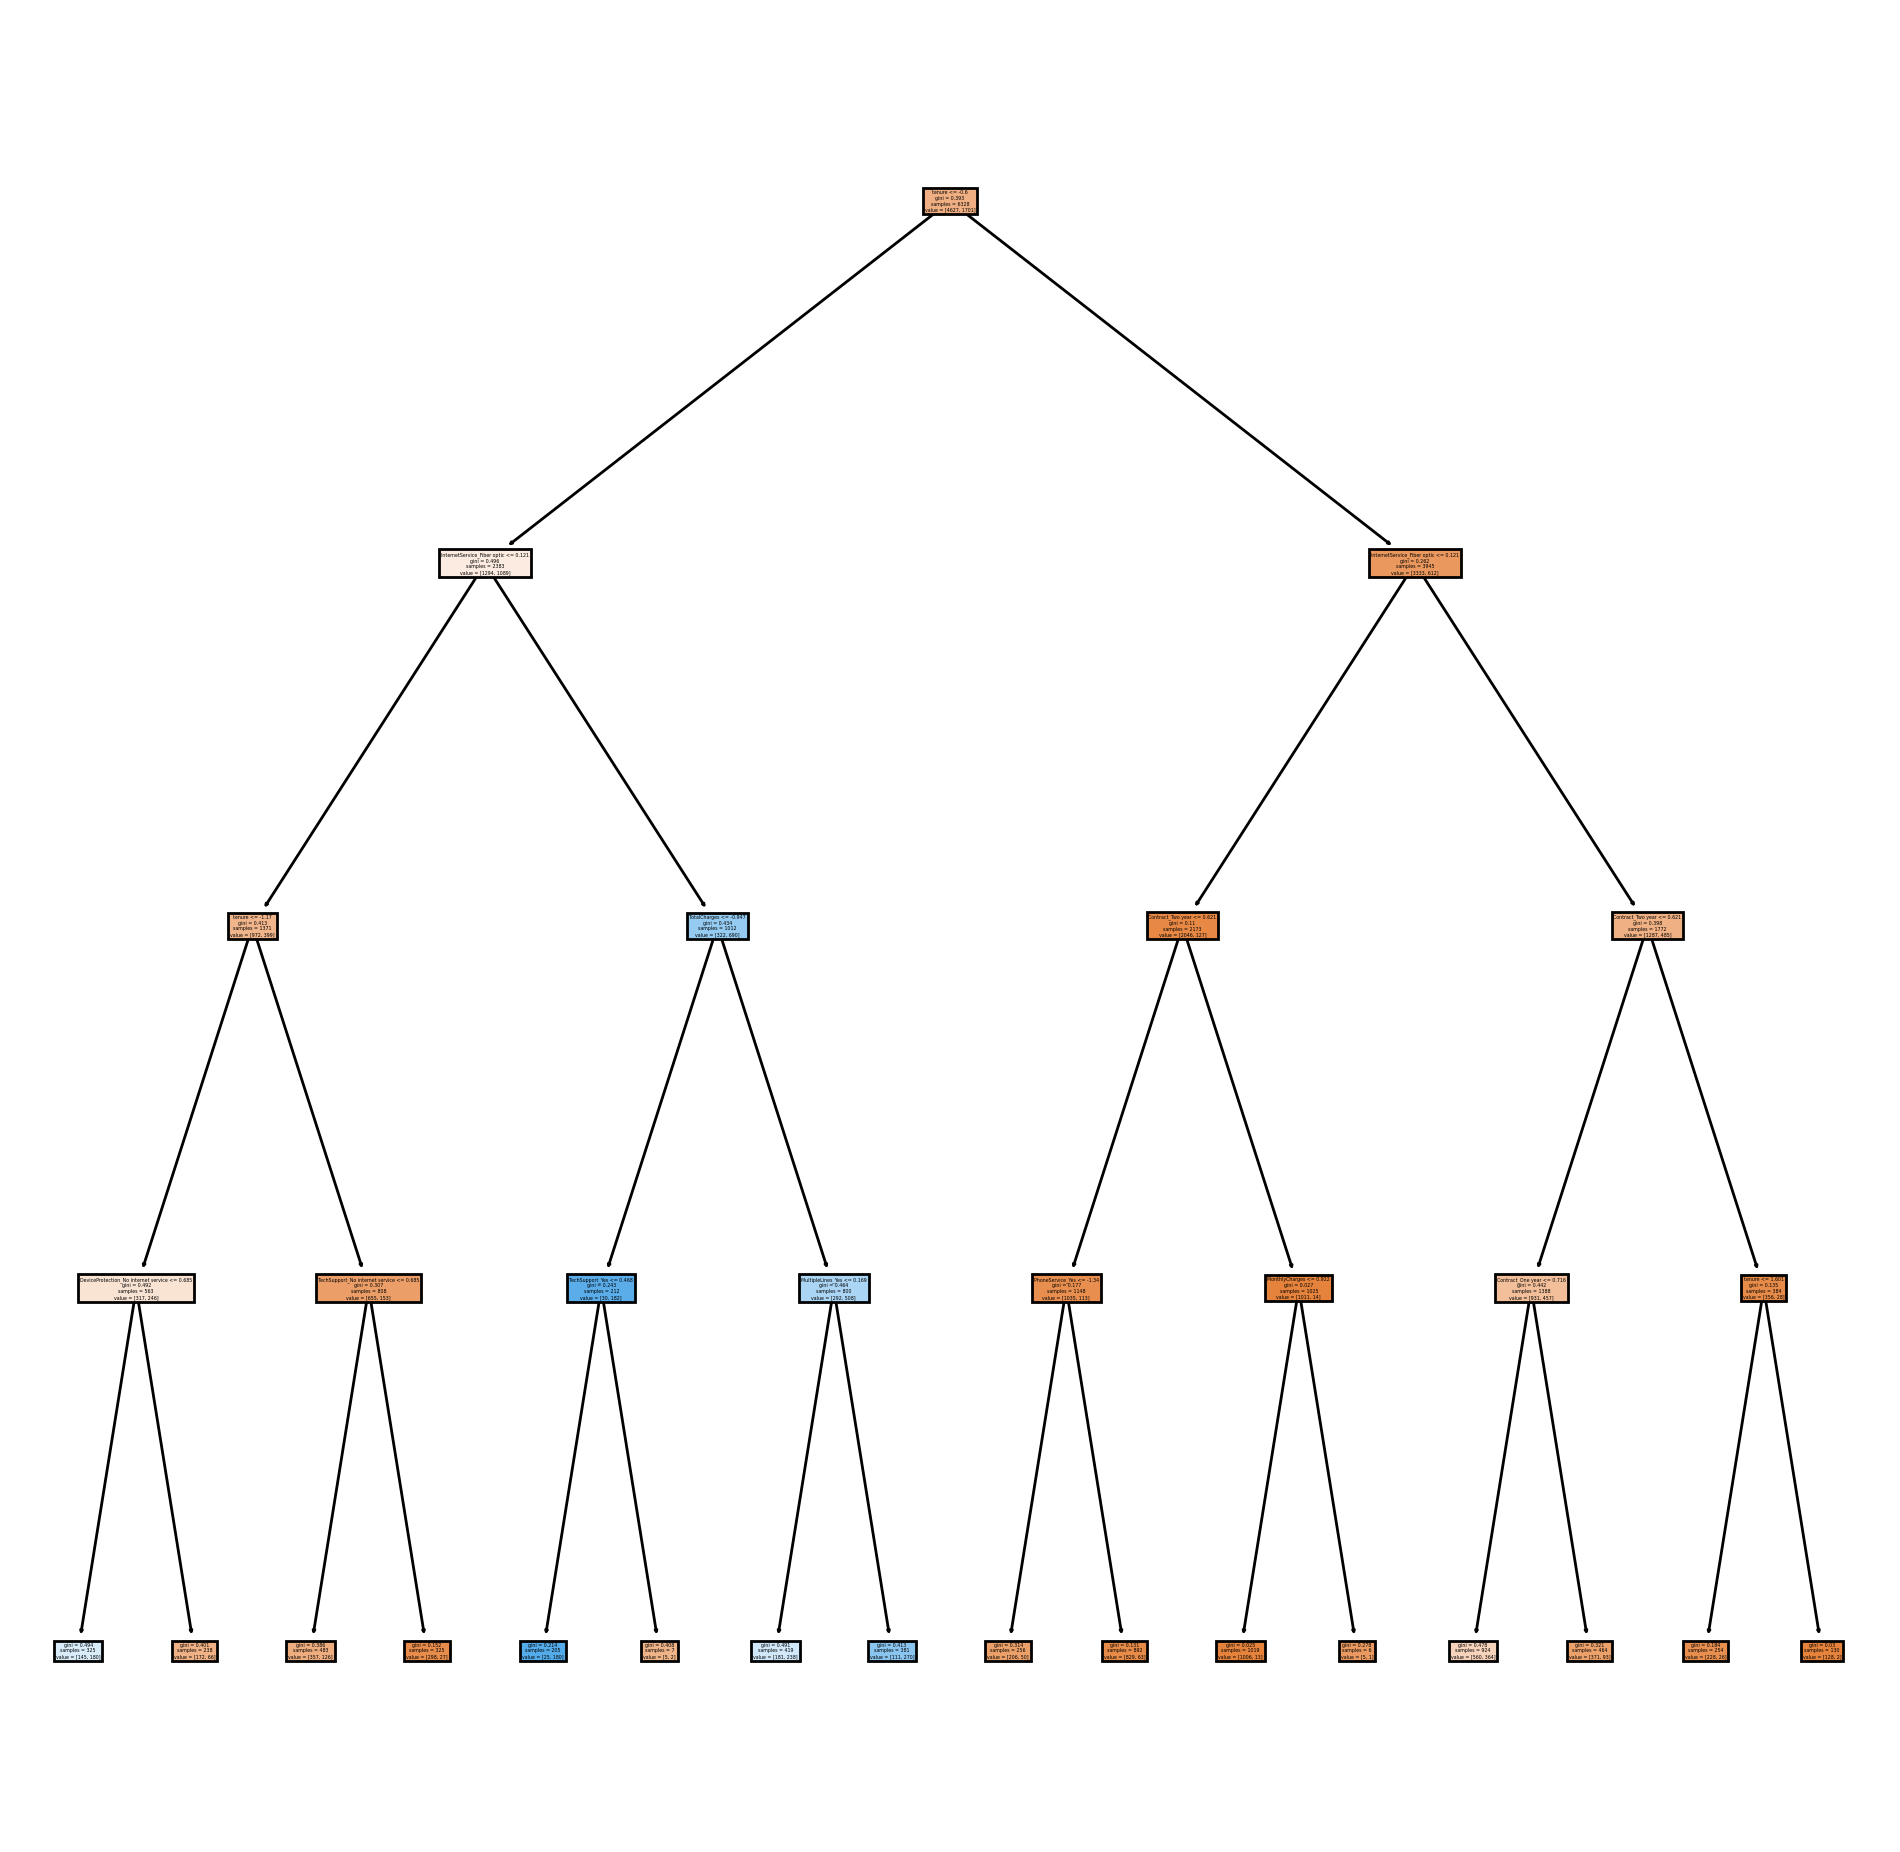

In [291]:
plt.figure(figsize = (12,12), dpi =200)
plot_tree(DTC, feature_names=x_train.columns, filled = True);

# Decission Tree Performance

In [293]:
print(classification_report(y_test, y_pred_DTC))

              precision    recall  f1-score   support

          No       0.85      0.87      0.86       536
         Yes       0.54      0.50      0.52       168

    accuracy                           0.78       704
   macro avg       0.69      0.68      0.69       704
weighted avg       0.77      0.78      0.78       704



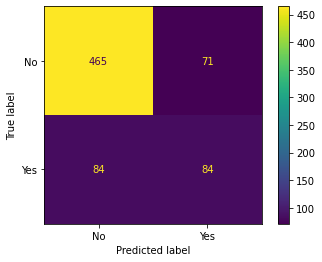

In [294]:
plot_confusion_matrix(DTC, x_test_scale, y_test)

# Random Forest

In [295]:
from sklearn.ensemble import RandomForestClassifier

In [296]:
n_estimators = [64, 100, 128, 200]

In [298]:
max_features = [2,6,10]

In [300]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features}

In [301]:
RFC = RandomForestClassifier()

In [302]:
grid_RFC = GridSearchCV(RFC, param_grid = param_grid)

In [303]:
grid_RFC.fit(x_train_scale, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 6, 10],
                         'n_estimators': [64, 100, 128, 200]})

In [304]:
grid_RFC.best_estimator_

RandomForestClassifier(max_features=6, n_estimators=200)

In [306]:
y_pred_RFC = grid_RFC.predict(x_test_scale)

# Random Forest Performance

In [307]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

          No       0.85      0.90      0.87       536
         Yes       0.60      0.49      0.54       168

    accuracy                           0.80       704
   macro avg       0.72      0.69      0.70       704
weighted avg       0.79      0.80      0.79       704



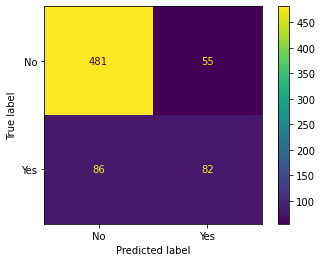

In [310]:
plot_confusion_matrix(grid_RFC, x_test_scale, y_test)

# Adaptive Boost

In [316]:
from sklearn.ensemble import AdaBoostClassifier

In [321]:
len(x_train_scale)

6328

In [329]:
error_rates = []
l = [1000, 2000, 3000, 4000, 5000]
for n in l:
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(x_train_scale, y_train)
    preds = model.predict(x_test)
    
    err = 1 -accuracy_score(y_test, preds)
    
    error_rates.append(err)

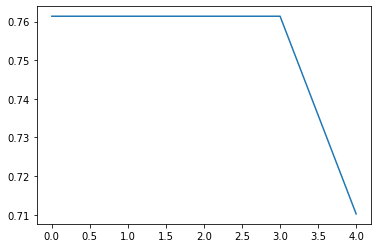

In [330]:
plt.plot(error_rates) #using n_estimator = 5000 because from graph low error is n_estimator above 4000

In [332]:
ABC = AdaBoostClassifier(n_estimators = 5000)

In [333]:
ABC.fit(x_train_scale, y_train)

AdaBoostClassifier(n_estimators=5000)

In [336]:
y_pred_ABC = ABC.predict(x_test_scale)

# Adaptive Boosting performance

In [337]:
print(classification_report(y_test, y_pred_ABC))

              precision    recall  f1-score   support

          No       0.86      0.87      0.87       536
         Yes       0.57      0.55      0.56       168

    accuracy                           0.79       704
   macro avg       0.72      0.71      0.71       704
weighted avg       0.79      0.79      0.79       704



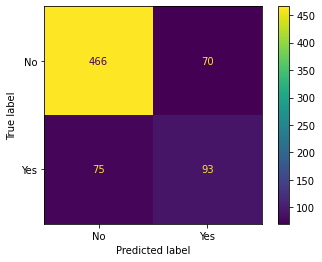

In [339]:
plot_confusion_matrix(ABC, x_test_scale, y_test)